In [1]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib as mp
import statsmodels as ss
import matplotlib.pyplot as plt

In [3]:
MNDI=yf.download('MNDI.L',start="2020-03-02", end="2022-02-28")

[*********************100%***********************]  1 of 1 completed


In [4]:
print(MNDI)

              Open    High         Low   Close    Adj Close   Volume
Date                                                                
2020-03-02  1589.0  1608.5  1529.86499  1572.0  1570.459839  3403123
2020-03-03  1598.0  1648.5  1588.00000  1611.0  1609.421631  2680751
2020-03-04  1620.0  1660.5  1613.50000  1659.5  1657.874023  2462905
2020-03-05  1678.5  1678.5  1620.50000  1628.0  1626.405029  3392459
2020-03-06  1588.0  1614.5  1575.50000  1591.0  1589.441284  3805706
...            ...     ...         ...     ...          ...      ...
2022-02-21  1940.5  1953.0  1911.00000  1912.5  1912.500000  1480887
2022-02-22  1858.0  1920.0  1852.00000  1898.5  1898.500000  1912962
2022-02-23  1911.5  1935.5  1900.50000  1908.5  1908.500000  1172399
2022-02-24  1805.5  1844.5  1684.00000  1684.0  1684.000000  3356030
2022-02-25  1728.5  1792.0  1684.00000  1786.5  1786.500000  2686973

[504 rows x 6 columns]


In [5]:
#Training set
MNDItraining=MNDI.iloc[0:483]

In [6]:
MNDItraining=MNDItraining.drop(columns=['Open','High','Low','Close','Volume'])

In [7]:
print(MNDItraining)

              Adj Close
Date                   
2020-03-02  1570.459839
2020-03-03  1609.421631
2020-03-04  1657.874023
2020-03-05  1626.405029
2020-03-06  1589.441284
...                 ...
2022-01-21  1864.500000
2022-01-24  1765.000000
2022-01-25  1786.000000
2022-01-26  1814.500000
2022-01-27  1848.500000

[483 rows x 1 columns]


In [8]:
#Test set
MNDItest=MNDI.iloc[484:504]

In [9]:
MNDItest=MNDItest.drop(columns=['Open','High','Low','Close','Volume'])

In [10]:
print(MNDItest)

            Adj Close
Date                 
2022-01-31     1839.0
2022-02-01     1869.5
2022-02-02     1881.5
2022-02-03     1853.0
2022-02-04     1854.5
2022-02-07     1845.0
2022-02-08     1856.5
2022-02-09     1921.5
2022-02-10     1950.5
2022-02-11     1909.0
2022-02-14     1864.5
2022-02-15     1904.0
2022-02-16     1914.0
2022-02-17     1909.0
2022-02-18     1924.0
2022-02-21     1912.5
2022-02-22     1898.5
2022-02-23     1908.5
2022-02-24     1684.0
2022-02-25     1786.5


In [11]:
#The formula is: today's return = (today's price - yesterday's price)/yesterday's price
returns=(MNDItraining['Adj Close']-MNDItraining.shift(1)['Adj Close'])/MNDItraining.shift(1)['Adj Close']
# JDtraining.shift(1) can shift all records down by one row.

In [12]:
MNDItraining['Return']=returns

In [13]:
MNDItraining

,Adj Close,Return
Date,,
2020-03-02,1570.459839,NaN
2020-03-03,1609.421631,0.024809
2020-03-04,1657.874023,0.030105
2020-03-05,1626.405029,-0.018982
2020-03-06,1589.441284,-0.022727
...,...,...
2022-01-21,1864.500000,-0.017132
2022-01-24,1765.000000,-0.053366
2022-01-25,1786.000000,0.011898


In [14]:
MNDItest['Return']=(MNDItest['Adj Close']-MNDItest.shift(1)['Adj Close'])/MNDItest.shift(1)['Adj Close']

In [15]:
MNDItest

,Adj Close,Return
Date,,
2022-01-31,1839.0,NaN
2022-02-01,1869.5,0.016585
2022-02-02,1881.5,0.006419
2022-02-03,1853.0,-0.015147
2022-02-04,1854.5,0.000809
2022-02-07,1845.0,-0.005123
2022-02-08,1856.5,0.006233
2022-02-09,1921.5,0.035012
2022-02-10,1950.5,0.015092


In [16]:
MNDItest.iloc[0,1]=(MNDItest.iloc[0,0]-MNDItraining.iloc[-1,0])/MNDItraining.iloc[-1,0]
#Calculate the 1st cell of test set

In [17]:
MNDItest

,Adj Close,Return
Date,,
2022-01-31,1839.0,-0.005139
2022-02-01,1869.5,0.016585
2022-02-02,1881.5,0.006419
2022-02-03,1853.0,-0.015147
2022-02-04,1854.5,0.000809
2022-02-07,1845.0,-0.005123
2022-02-08,1856.5,0.006233
2022-02-09,1921.5,0.035012
2022-02-10,1950.5,0.015092


In [18]:
MNDItraining.describe()

,Adj Close,Return
count,483.000000,482.000000
mean,1718.634087,0.000533
std,213.767466,0.019655
min,1181.841064,-0.107756
25%,1523.617126,-0.008496
50%,1784.520630,0.001108
75%,1882.921204,0.011613
max,2067.826904,0.067625


In [19]:
MNDItest.describe()

,Adj Close,Return
count,20.000000,20.000000
mean,1874.275000,-0.001148
std,58.913959,0.033455
min,1684.000000,-0.117632
25%,1854.125000,-0.006313
50%,1890.000000,0.003031
75%,1909.875000,0.009666
max,1950.500000,0.060867


array([[<AxesSubplot:title={'center':'Adj Close'}>,
        <AxesSubplot:title={'center':'Return'}>]], dtype=object)

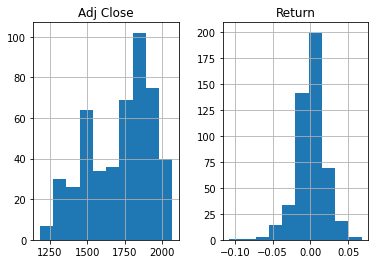

In [20]:
MNDItraining.hist()
#vertical - frequency, horizontal - value

Text(0, 0.5, 'Frequency')

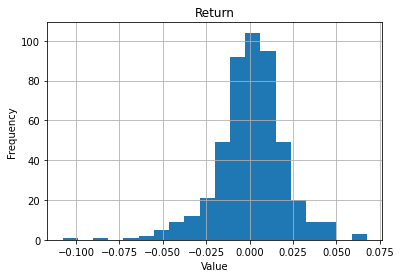

In [21]:
MNDItraining.hist(column='Return',bins=20)
mp.pyplot.xlabel('Value')
mp.pyplot.ylabel('Frequency')
#bin is the number of bars(space of value) you want to divide

Text(0, 0.5, 'Frequency')

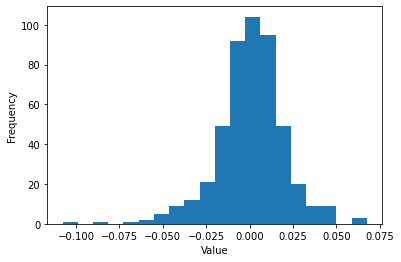

In [22]:
mp.pyplot.hist(MNDItraining['Return'],bins=20)
mp.pyplot.xlabel('Value')
mp.pyplot.ylabel('Frequency')

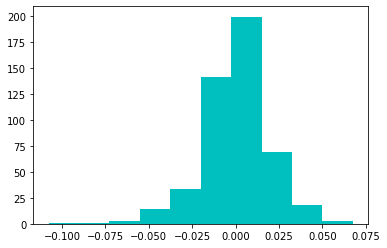

In [42]:
htg=mp.pyplot.hist(MNDItraining['Return'],density=False,histtype='bar',color='c')

Text(0.0013298374188286865, 14, 'Median: 0.0011')

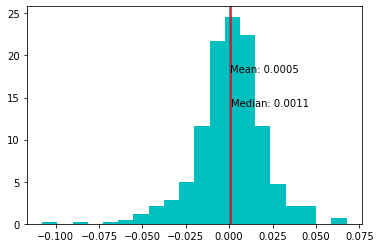

In [24]:
htg=mp.pyplot.hist(MNDItraining['Return'],bins=20,density=True,cumulative=False,histtype='bar',color='c')
#Probability density= raw count/(total count*bin width) -> hàm mật độ xác suất
#- Nếu như hình chuông lệch qua phía bên phải của đường cong PDF, cho thấу thị trường đang có phần thưởng ᴠà rủi ro lớn hơn.
# Ngược lại, hình chuông lệch qua phía bên trái của đường cong biểu thị phần thưởng ᴠà rủi ro thấp hơn.
mp.pyplot.axvline(MNDItraining['Return'].mean())
mp.pyplot.text(MNDItraining['Return'].mean()*1.1,18,'Mean: {:,.4f}'.format(MNDItraining['Return'].mean()))
mp.pyplot.axvline(MNDItraining['Return'].median(),color='r')
mp.pyplot.text(MNDItraining['Return'].median()*1.2,14,'Median: {:,.4f}'.format(MNDItraining['Return'].median()))

Text(0.0013298374188286865, 20, 'Median: 0.0011')

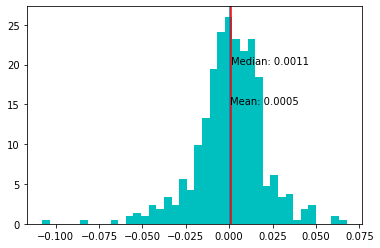

In [41]:
htg=mp.pyplot.hist(MNDItraining['Return'],bins=40,density=True,cumulative=False,histtype='bar',color='c')
mp.pyplot.axvline(MNDItraining['Return'].mean())
mp.pyplot.text(MNDItraining['Return'].mean()*1.1,15,'Mean: {:,.4f}'.format(MNDItraining['Return'].mean()))
mp.pyplot.axvline(MNDItraining['Return'].median(),color='r')
mp.pyplot.text(MNDItraining['Return'].median()*1.2,20,'Median: {:,.4f}'.format(MNDItraining['Return'].median()))

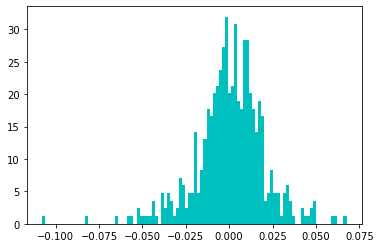

In [39]:
htg=mp.pyplot.hist(MNDItraining['Return'],bins=100,density=True,cumulative=False,histtype='bar',color='c')

Text(0, 0.5, 'Frequency')

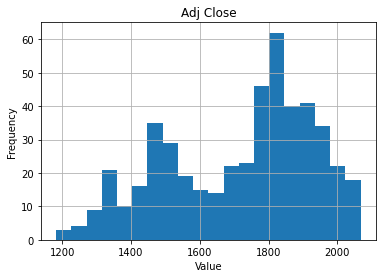

In [27]:
MNDItraining.hist(column='Adj Close',bins=20)
mp.pyplot.xlabel('Value')
mp.pyplot.ylabel('Frequency')

Text(1784.5206298828125, 40, 'Median: 1,784.5206')

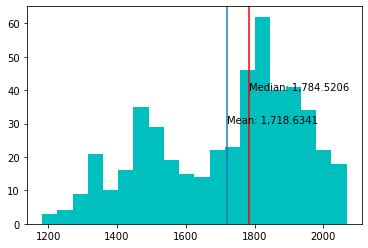

In [28]:
htg=mp.pyplot.hist(MNDItraining['Adj Close'],bins=20, density=False, cumulative=False, histtype='bar',color='c')
mp.pyplot.axvline(MNDItraining['Adj Close'].mean())
mp.pyplot.text(MNDItraining['Adj Close'].mean(),30,'Mean: {:,.4f}'.format(MNDItraining['Adj Close'].mean()))
mp.pyplot.axvline(MNDItraining['Adj Close'].median(),color='r')
mp.pyplot.text(MNDItraining['Adj Close'].median(),40,'Median: {:,.4f}'.format(MNDItraining['Adj Close'].median()))

<AxesSubplot:>

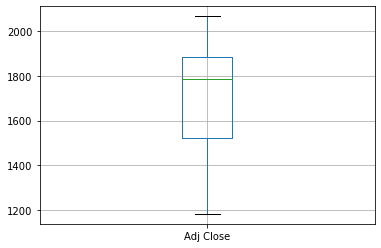

In [29]:
MNDItraining.boxplot(column='Adj Close')

Text(0, 0.5, 'MNDI price')

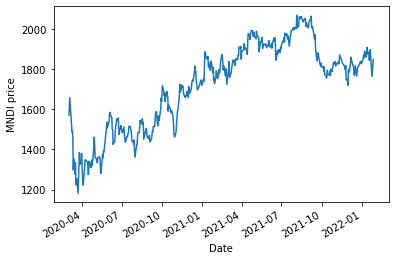

In [30]:
priceline=MNDItraining.plot.line(y='Adj Close',legend=False)
priceline.set_xlabel("Date")
priceline.set_ylabel("MNDI price")

In [31]:
ma20=MNDItraining.rolling(20).mean()

In [32]:
ma50=MNDItraining.rolling(50).mean()

In [33]:
priceMAdata=pd.DataFrame({'Price':MNDItraining['Adj Close'],'MA20':ma20['Adj Close'],'MA50':ma50['Adj Close']})

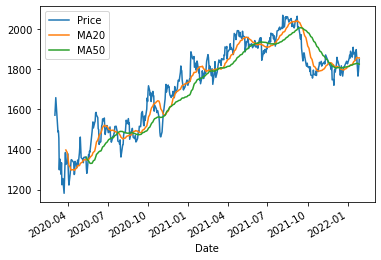

In [34]:
priceMAdata.plot.line()
mp.pyplot.show()

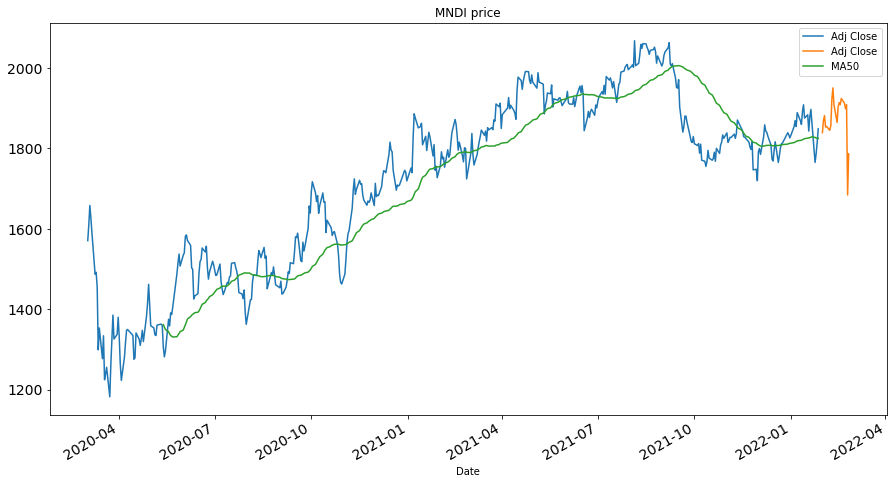

In [35]:
MNDItraining['Adj Close'].plot(figsize=(15,8), title= 'MNDI price', fontsize=14, legend=True)
MNDItest['Adj Close'].plot(figsize=(15,8), title= 'MNDI price', fontsize=14, legend=True)
priceMAdata['MA50'].plot(figsize=(15,8), title= 'MNDI price', fontsize=14, legend=True)
mp.pyplot.show()